# File Description
This notebook is for visualising the vegetation data for Tarawa.
The data can be found at http://pacgeo.org/layers/geonode:kiribati_vector, published May 18, 2017.

# File Setup

In [1]:
from IPython import embed
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import geopandas as gpd
import cartopy
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Load and format the data

In [2]:
# Load the data using geopandas

folder_loc = r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Land_use_cover'

gdf_veg = gpd.read_file('{}\kiribati_vector.shp'.format(folder_loc))

# convert the geopandas to pandas
df_veg = pd.DataFrame(gdf_veg)


In [3]:
gdf_veg.head(10)

,ID,CLASS_NAME,SUB_CLASS,COUNTRY,geometry
0,5,Coconut Plantation,None,KI,"POLYGON ((173.93558 0.34755, 173.93558 0.34718..."
1,1,Secondary Forest,None,KI,"POLYGON ((173.83628 0.49505, 173.83628 0.49514..."
2,7,Open Land,None,KI,"POLYGON ((173.83323 0.49478, 173.83314 0.49478..."
3,7,Open Land,None,KI,"POLYGON ((173.83269 0.49487, 173.83287 0.49487..."
4,7,Open Land,None,KI,"POLYGON ((173.83269 0.49451, 173.83260 0.49451..."
5,7,Open Land,None,KI,"POLYGON ((173.83287 0.49441, 173.83278 0.49441..."
6,7,Open Land,None,KI,"POLYGON ((173.83323 0.49478, 173.83332 0.49478..."
7,1,Secondary Forest,None,KI,"POLYGON ((173.83798 0.49432, 173.83789 0.49432..."
8,13,Settlement,None,KI,"POLYGON ((173.83233 0.49423, 173.83206 0.49423..."
9,7,Open Land,None,KI,"POLYGON ((173.83233 0.49423, 173.83233 0.49441..."


# Plot the data

(1.3, 1.68)

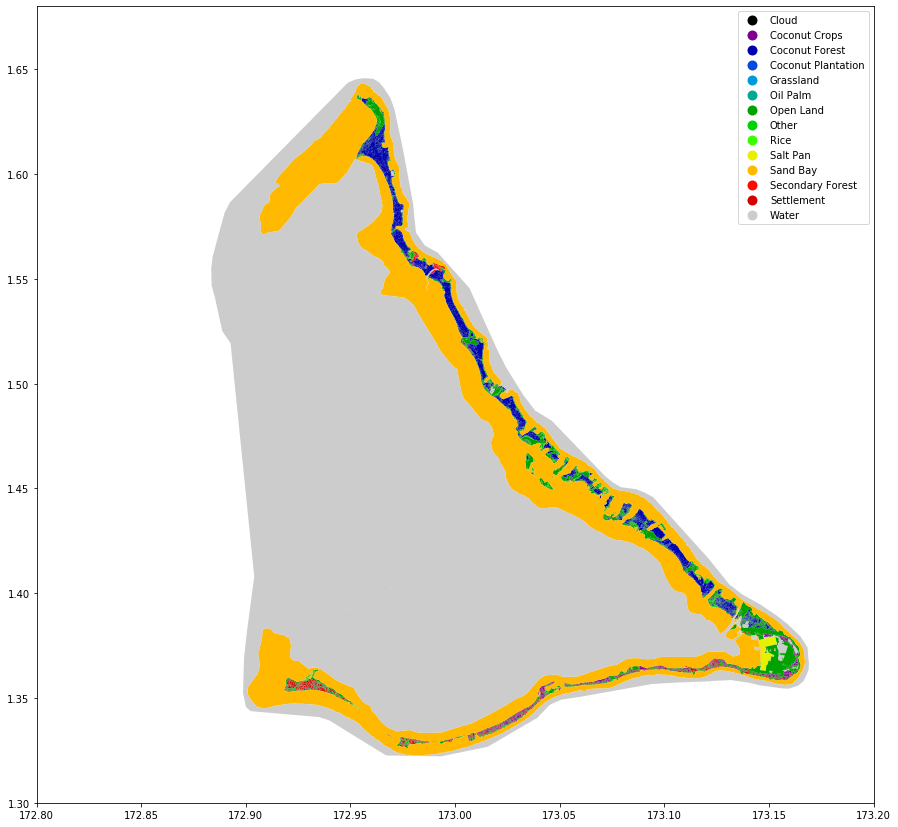

In [4]:
fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((1,1),(0,0))

gdf_veg.plot(column='CLASS_NAME',legend=True,ax=ax1,cmap='nipy_spectral')

ax1.set_xlim(172.8,173.2)
ax1.set_ylim(1.3,1.68)

In [39]:
water = gdf_veg[gdf_veg['CLASS_NAME']=='Water']
not_water = gdf_veg[gdf_veg['CLASS_NAME']!='Water']
not_water.loc[:,'CLASS_NAME'] = 'not_water'

C:\Users\shannonb\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [266]:
from geocube.api.core import make_geocube

cube = make_geocube(vector_data=g, resolution=(1, -1))

ModuleNotFoundError: No module named 'geocube'

In [ ]:
import sys
!{sys.executable} -m set GDAL_VERSION=3.2.1
# !{sys.executable} -m pip install rasterio

!{sys.executable} -m pip install --install-option=build_ext --install-option="-I C:\OSGeo4W64\include" --install-option="-lgdal_i" --install-option="-L C:\OSGeo4W64\lib" rasterio

C:\ProgramData\Anaconda3\python.exe: No module named set


In [50]:
water['geometry'][19].centroid

'POINT (173.829055577477 0.4995669279576712)'

In [227]:
import sys

def getXY(pt):
    return (pt.x, pt.y)

centroidseries_water = water['geometry'].centroid
x_water,y_water = [list(t) for t in zip(*map(getXY, centroidseries_water))]

centroidseries_notwater = not_water['geometry'].centroid
x_notwater,y_notwater = [list(t) for t in zip(*map(getXY, centroidseries_notwater))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':


In [232]:
df_water = pd.DataFrame({'long':x_water,'lat':y_water,'value':'water'})
df_notwater = pd.DataFrame({'long':x_notwater,'lat':y_notwater,'value':'not_water'})

df_water = df_water[(df_water.long>172.8)&(df_water.long<173.2)&(df_water.lat>1.3)&(df_water.lat<1.68)]
df_notwater = df_notwater[(df_notwater.long>172.8)&(df_notwater.long<173.2)&(df_notwater.lat>1.3)&(df_notwater.lat<1.68)]

df_all_points = pd.concat([df_water,df_notwater])



(1.3, 1.68)

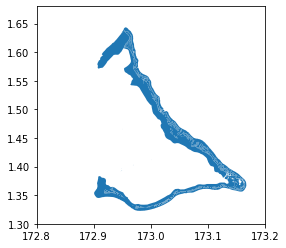

In [250]:
ax1 = plt.subplot2grid((1,1),(0,0))

not_water.plot(ax=ax1)

ax1.set_xlim(172.8,173.2)
ax1.set_ylim(1.3,1.68)

In [235]:
shoreline_dict = {}

land_dict = {}

for index,row in df_notwater.iterrows():
    
    long = row['long']
    lat = row['lat']
        
    land_dict.update({
        index:{
            'long':long,
            'lat':lat
        }
    })
    
    min_loc = df_water.loc[(((df_water.long-long)**2+(df_water.lat-lat)**2)**0.5).idxmin()]
    
    shoreline_dict.update({
        index:min_loc
    })
    


In [236]:
test = pd.DataFrame(shoreline_dict).T

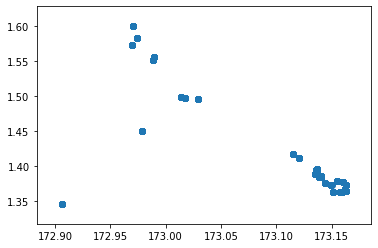

In [237]:

plt.scatter(test.long,test.lat)

(1.3, 1.68)

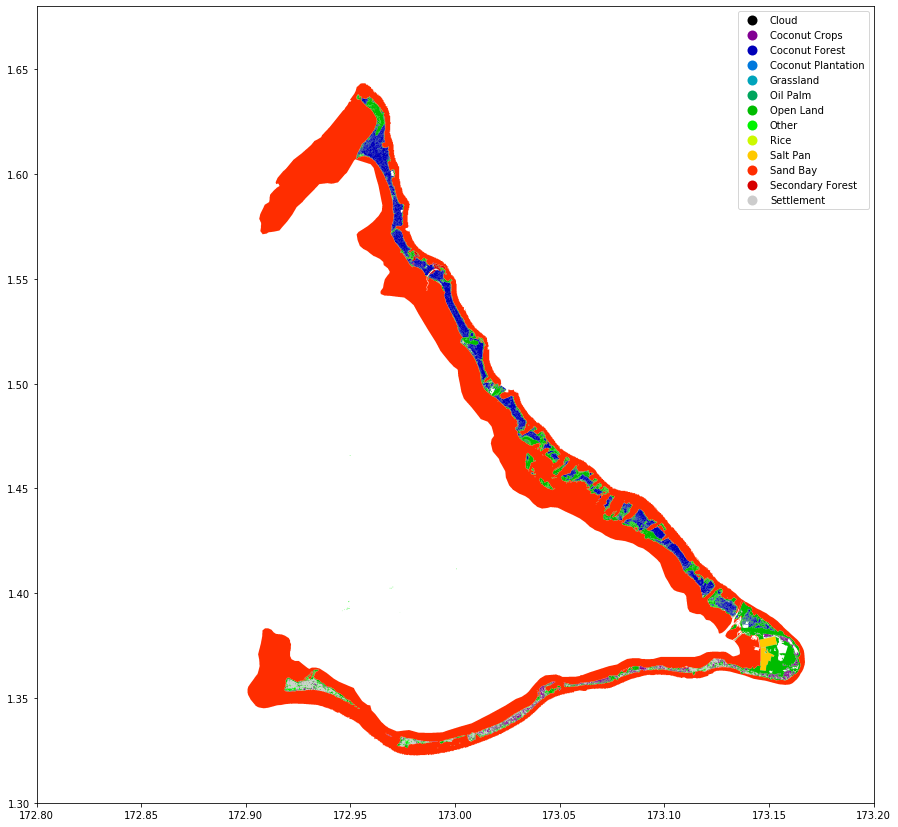

In [35]:
fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((1,1),(0,0))

not_water.plot(column='CLASS_NAME',legend=True,ax=ax1,cmap='nipy_spectral')

ax1.set_xlim(172.8,173.2)
ax1.set_ylim(1.3,1.68)

In [33]:
from shapely.geometry import Point

[x for x in test['geometry']]

 ...]

19        POLYGON ((173.82919 0.49948, 173.82892 0.49948...
20        POLYGON ((173.82039 0.49740, 173.82057 0.49740...
21        POLYGON ((173.84570 0.49613, 173.84561 0.49613...
24        POLYGON ((173.81483 0.49524, 173.81492 0.49524...
679       POLYGON ((173.84319 0.48465, 173.84301 0.48465...
                                ...                        
213300    POLYGON ((174.44456 -0.78809, 174.44447 -0.788...
213315    POLYGON ((174.43989 -0.79044, 174.43980 -0.790...
213396    POLYGON ((174.47481 -0.80329, 174.47481 -0.803...
213480    POLYGON ((174.46205 -0.81766, 174.45442 -0.817...
213486    POLYGON ((174.46896 -0.81766, 174.46474 -0.817...
Name: geometry, Length: 3375, dtype: geometry

# Load building exposure data

In [5]:
# Load the data using geopandas

folder_loc = r'C:\Users\shannonb\Documents\Model_and_data\Dataset\Additional_data\Building_exposure_data\Data'

gdf_building = gpd.read_file('{}\ki_bldexp_modelled.shp'.format(folder_loc))
gdf_building['Value_log']  = np.log(gdf_building['Value'])

In [6]:
gdf_building.head(10)

,Type,Latitude,Longitude,LocType,MainOcc,Occ,Const,NumStories,FloorArea,AttType,Value,totBuildin,ID,geometry,Value_log
0,KI,-2.486891,175.966567,Verified,Residential,Residential - Out building,Single Story Masonry/Concrete,1.0,25.2,Modeled,1260.0,1.0,4.0,POINT (175.96657 -2.48689),7.138867
1,KI,-2.486830,175.966533,Verified,Infrastructure,Infrastructure,Other Single Story,1.0,25.2,Modeled,18900.0,1.0,4.0,POINT (175.96653 -2.48683),9.846917
2,KI,-2.486786,175.966539,Verified,Residential,Residential - Permanent dwelling single family,Traditional,1.0,25.2,Modeled,1890.0,1.0,4.0,POINT (175.96654 -2.48679),7.544332
3,KI,-2.486788,175.966498,Verified,Residential,Residential - Permanent dwelling single family,Traditional,1.0,25.2,Modeled,1890.0,1.0,4.0,POINT (175.96650 -2.48679),7.544332
4,KI,-2.487226,175.966532,Verified,Residential,Residential - Permanent dwelling single family,Traditional,1.0,25.2,Modeled,1890.0,1.0,4.0,POINT (175.96653 -2.48723),7.544332
5,KI,-2.488360,175.965865,Verified,Residential,Residential - Out building,Single Story Masonry/Concrete,1.0,25.2,Modeled,1260.0,1.0,4.0,POINT (175.96587 -2.48836),7.138867
6,KI,-2.488724,175.966373,Verified,Residential,Residential - Permanent dwelling single family,Single Story Masonry/Concrete,1.0,25.2,Modeled,7560.0,1.0,4.0,POINT (175.96637 -2.48872),8.930626
7,KI,-2.488780,175.966441,Verified,Residential,Residential - Out building,Single Story Timber Frame,1.0,25.2,Modeled,1260.0,1.0,4.0,POINT (175.96644 -2.48878),7.138867
8,KI,-2.490691,175.966731,Verified,Residential,Residential - Permanent dwelling single family,Traditional,1.0,25.2,Modeled,1890.0,1.0,4.0,POINT (175.96673 -2.49069),7.544332
9,KI,-2.491004,175.967171,Verified,Residential,Residential - Out building,Single Story Masonry/Concrete,1.0,25.2,Modeled,1260.0,1.0,4.0,POINT (175.96717 -2.49100),7.138867


Text(0.5, 1, 'Building exposure')

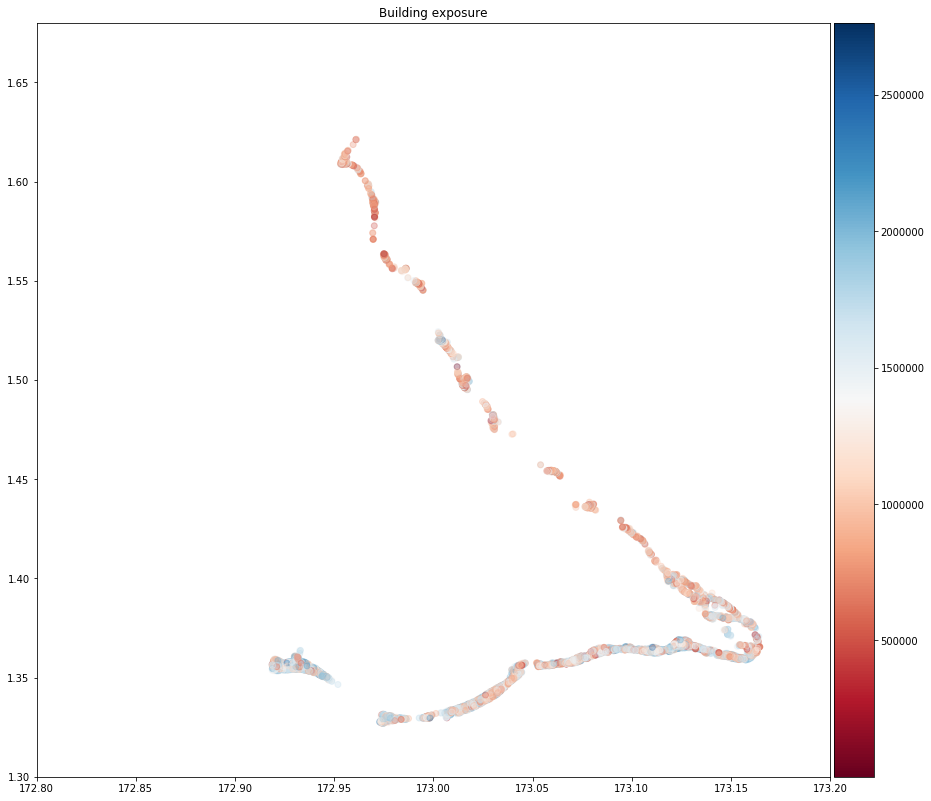

In [7]:
fig = plt.figure(figsize=(15,15))

ax1 = plt.subplot2grid((1,1),(0,0))

gdf_building.plot(column='Value_log',ax=ax1,cmap='RdBu',alpha=0.3)

cmap = matplotlib.cm.RdBu
norm = matplotlib.colors.Normalize(vmin=np.min(gdf_building.Value),
                            vmax=np.max(gdf_building.Value))

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)

cb1 = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')

ax1.set_xlim(172.8,173.2)
ax1.set_ylim(1.3,1.68)
ax1.set_title('Building exposure')

In [8]:
norm



In [9]:
legends

NameError: name 'legends' is not defined

In [ ]:
ax1.get_children()